In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Data

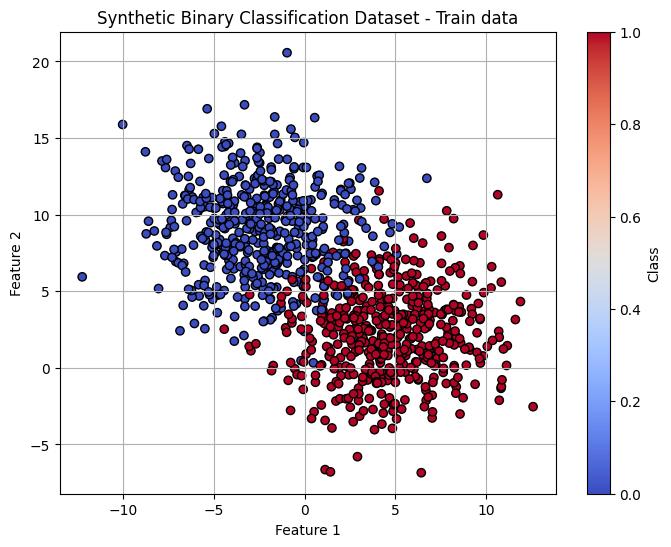

In [ ]:
# Generate synthetic dataset with 1200 samples
X, y = make_blobs(n_samples=1200, centers=2, n_features=2, cluster_std=3.0, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42)


# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolors='k')
plt.title('Synthetic Binary Classification Dataset - Train data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train predictions
    train_pred = model.predict(X_train)

    # Test predictions
    test_pred = model.predict(X_test)

    # Train accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    print("Train Accuracy:", train_accuracy)

    # Test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)
    print("Test Accuracy:", test_accuracy)

    # Train confusion matrix
    train_conf_matrix = confusion_matrix(y_train, train_pred)
    print("\nTrain Confusion Matrix:")
    print(train_conf_matrix)

    # Test confusion matrix
    test_conf_matrix = confusion_matrix(y_test, test_pred)
    print("\nTest Confusion Matrix:")
    print(test_conf_matrix)

    # Calculate precision, recall, and F1-score for training set
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    train_f1_score = f1_score(y_train, train_pred)

    print("\nTrain Precision:", train_precision)
    print("Train Recall:", train_recall)
    print("Train F1 Score:", train_f1_score)

    # Calculate precision, recall, and F1-score for test set
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1_score = f1_score(y_test, test_pred)

    print("\nTest Precision:", test_precision)
    print("Test Recall:", test_recall)
    print("Test F1 Score:", test_f1_score)

    # Train ROC AUC score
    train_roc_auc = roc_auc_score(y_train, train_pred)
    print("\nTrain ROC AUC Score:", train_roc_auc)

    # Test ROC AUC score
    test_roc_auc = roc_auc_score(y_test, test_pred)
    print("Test ROC AUC Score:", test_roc_auc)


In [ ]:
evaluate_model(lr_model, X_train, y_train, X_test, y_test)

Train Accuracy: 0.951
Test Accuracy: 0.95

Train Confusion Matrix:
[[468  24]
 [ 25 483]]

Test Confusion Matrix:
[[103   5]
 [  5  87]]

Train Precision: 0.9526627218934911
Train Recall: 0.9507874015748031
Train F1 Score: 0.9517241379310345

Test Precision: 0.9456521739130435
Test Recall: 0.9456521739130435
Test F1 Score: 0.9456521739130435

Train ROC AUC Score: 0.9510034568849626
Test ROC AUC Score: 0.9496779388083736


# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the range of K values to try
k_values = list(range(1, 41))  # Trying K values from 1 to 40

# Initialize list to store mean cross-validation scores for each K
cv_scores = []

# Perform cross-validation for each value of K
for k in k_values:
    # Initialize KNN classifier with current K value
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation with 5 folds, explicitly specifying accuracy as the scoring metric
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Calculate mean cross-validation score for this K value
    mean_cv_score = scores.mean()

    # Append mean cross-validation score to the list
    cv_scores.append(mean_cv_score)


In [ ]:
cv_scores

In [ ]:
# Find the best K value based on cross-validation scores
best_k = k_values[cv_scores.index(max(cv_scores))]

# Plot mean cross-validation scores vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validation Score vs K for KNN')
plt.xlabel('K')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print the best K value
print("Best K (Cross-Validation):", best_k)

In [ ]:
# Evaluate the model
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)
evaluate_model(best_knn_model, X_train, y_train, X_test, y_test)


We achieved a very similar result to the Logistic Regression.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def plot_decision_boundary(X, y, k):
    # Train KNN classifier with the specified k
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X, y)

    # Generate a grid of points covering the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Use the trained classifier to predict the class labels for each point in the grid
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
    plt.title('Decision Boundary for KNN with k={}'.format(k))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example usage
plot_decision_boundary(X_train, y_train, k=1)
plot_decision_boundary(X_train, y_train, k=2)
plot_decision_boundary(X_train, y_train, k=5)
plot_decision_boundary(X_train, y_train, k=10)
plot_decision_boundary(X_train, y_train, k=33)


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the range of C values to try
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Adjust the range as needed

# Initialize variables to store the mean cross-validation scores for each C value
cv_scores = []

# Perform cross-validation for each value of C
for C in C_values:
    # Initialize SVM classifier with linear kernel and current C value
    svm_model = SVC(kernel='linear', C=C)

    # Perform cross-validation with 5 folds, explicitly specifying accuracy as the scoring metric
    scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate mean cross-validation score for this C value
    mean_cv_score = np.mean(scores)

    # Append mean cross-validation score to the list
    cv_scores.append(mean_cv_score)



# Plot cross-validation scores vs C
plt.figure(figsize=(10, 6))
plt.plot(C_values, cv_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validation Score vs C for SVM with Linear Kernel')
plt.xlabel('C')
plt.ylabel('Mean Cross-Validation Score')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()



In [ ]:

# Find the best C value based on cross-validation scores
best_C = C_values[np.argmax(cv_scores)]

# Print the best C value
print("Best C (Cross-Validation):", best_C)

In [ ]:
# Evaluate the model
best_svm_model = SVC(kernel='linear', C=best_C)
best_svm_model.fit(X_train, y_train)
evaluate_model(best_svm_model, X_train, y_train, X_test, y_test)

# Non Linear Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("non_linear_data.csv")
print(df.shape)
df.head(3)


In [ ]:
# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=34)

X_train = df_train[['feature_1', 'feature_2']].values
y_train = df_train['y'].values
X_test = df_test[['feature_1', 'feature_2']].values
y_test = df_test['y'].values

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

In [ ]:
def plot_data(X, y):
    # Plot the generated data
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], s=5, c='b', alpha=0.5, label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], s=5, c='r', alpha=0.5, label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Train Data')
    plt.axis('equal')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

In [ ]:
plot_data(X_train, y_train)

In [ ]:
# Define the range of K values to try
k_values = list(range(1, 31))  # Trying K values from 1 to 30

# Initialize list to store mean cross-validation scores for each K
cv_scores = []

# Perform cross-validation for each value of K
for k in k_values:
    # Initialize KNN classifier with current K value
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation with 5 folds, explicitly specifying accuracy as the scoring metric
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate mean cross-validation score for this K value
    mean_cv_score = np.mean(scores)

    # Append mean cross-validation score to the list
    cv_scores.append(mean_cv_score)

# Find the best K value based on cross-validation scores
best_k = k_values[np.argmax(cv_scores)]

# Plot mean cross-validation scores vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validation Score vs K for KNN')
plt.xlabel('K')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print the best K value
print("Best K (Cross-Validation):", best_k)


In [ ]:
def plot_decision_boundary(X, y, k):
    # Train KNN classifier with the specified k
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X, y)

    # Generate a grid of points covering the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Use the trained classifier to predict the class labels for each point in the grid
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
    plt.title('Decision Boundary for KNN with k={}'.format(k))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


# Plot decision boundary for best K
plot_decision_boundary(X_train, y_train, best_k)

In [ ]:
# Evaluate the model
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)
evaluate_model(best_knn_model, X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]  # Adjust the range as needed

cv_scores = []

# Perform cross-validation for each value of C
for C in C_values:
    svm_model = SVC(kernel='rbf', C=C)

    # Perform cross-validation with 5 folds, explicitly specifying accuracy as the scoring metric
    scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

    mean_cv_score = np.mean(scores)

    cv_scores.append(mean_cv_score)

# Find the best C value based on cross-validation scores
best_C = C_values[np.argmax(cv_scores)]

# Plot mean cross-validation scores vs C
plt.figure(figsize=(10, 6))
plt.plot(C_values, cv_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validation Score vs C for SVM with RBF Kernel')
plt.xlabel('C')
plt.ylabel('Mean Cross-Validation Score')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()

# Print the best C value
print("Best C (Cross-Validation):", best_C)


In [ ]:
# Evaluate the model
best_svm_model = SVC(kernel='rbf', C=best_C)
best_svm_model.fit(X_train, y_train)
evaluate_model(best_svm_model, X_train, y_train, X_test, y_test)

We see that KNN performed slightly better than the SVM approach.

# Exercise

1. https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

2. https://www.kaggle.com/competitions/higgs-boson/overview    (more difficult)


So one last thing.
When you are presented with a data which has many features( more than 1 or 2) and you can't visualize it, you'll never know what shape it has.


So the procedure is always to start from the easiest. In the case of SVM, you start with a linear kernel, then try other kernels and watch the cross validation performance (for ex. accuracy) to see which one might work better on the test before you decide to ship your model.

So it never hurts to try out a suit of different models!
And that is what you need to do on the exercises I gave you.
Please remember to understand your data (features, preprocessing, missing values, encoding) before you apply any model.

As for encoding, you need to choose the right encoding for the right model. If you are not sure, simply ask ChatGPT.
